In [1]:
import pandas as pd
import requests
import time
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load imbd movies dataset
url = '/Users/rishikeshdhokare/Downloads/MergedDataSet/Cleaned/final_merged_file.csv'
df = pd.read_csv(url)

######### Year column #########
df['Year_y'] = np.where(df['Year_y'].isnull(), df['Year_x'], df['Year_y'])
df.drop('Year_x', axis=1, inplace=True)

######### Year column #########
# Merge Genre_x and Genre_y into a new column called 'Genre'
df['Genre'] = df['Genre_x'].fillna('') + df['Genre_y'].fillna('')
df['Genre'] = df['Genre'].str.strip()

df.drop('Genre_x', axis=1, inplace=True)
df.drop('Genre_y', axis=1, inplace=True)

######### Metascore column #########
df['Metascore_y'] = df['Metascore_y'].fillna(df['Metascore_x'])
df.drop(columns=['Metascore_x'], inplace=True)
df.rename(columns={'Metascore_y': 'Metascore'}, inplace=True)

######### Metascore column #########
df['Director_y'] = df['Director_y'].fillna(df['Director_x'])
df.drop(columns=['Director_x'], inplace=True)
df.rename(columns={'Director_y': 'Director'}, inplace=True)

df.columns = df.columns.str.replace(r'(_x_x|_x_y|_x|_y)$', '', regex=True)

######### imdbRating column #########
# Replace null values in 'imdbRating' with values from 'Rating'
df['imdbRating'] = df['imdbRating'].fillna(df['Rating'])
df.drop(columns=['Rating'], inplace=True)

######### Cast column #########
df['Cast'] = df['Cast'].fillna(df['Actors'])
df.drop('Actors', axis=1, inplace=True)
df.rename(columns={'Cast': 'Actor'}, inplace=True)

# Drop rows where 'BoxOffice' is NaN or empty
df = df.dropna(subset=['BoxOffice'])
df = df[df['BoxOffice'] != '']

#drop columns 
df.drop('Review Count', axis=1, inplace=True)
df.drop('Review Title', axis=1, inplace=True)
df.drop('Duration', axis=1, inplace=True)
df.drop('Metascore', axis=1, inplace=True)
df.drop('Review_Title', axis=1, inplace=True)
df.drop('Review_Count', axis=1, inplace=True)
df.drop('Review', axis=1, inplace=True)
df.drop('Description', axis=1, inplace=True)
df.drop('Poster', axis=1, inplace=True)
df.drop('Plot', axis=1, inplace=True)
df.drop('Certificate', axis=1, inplace=True)
df.drop('Votes', axis=1, inplace=True)

# Replace 'Ã' with an empty string or appropriate character
df.replace({'ÃÂ': ''}, regex=True, inplace=True)

###Remove limits in columns and rows display###
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

# Reorder columns: Move specified columns to the front
new_order = ['Title', 'Actor', 'Genre', 'imdbRating', 'imdbVotes', 'Runtime','BoxOffice', 'Year'] + [col for col in df.columns if col not in ['Title', 'Actor', 'Genre', 'imdbRating', 'imdbVotes','Runtime', 'BoxOffice', 'Year']]
df = df[new_order]
df

Title  \
0                                   10 Cloverfield Lane   
1                                            12 Monkeys   
2                                      12 Years a Slave   
4                                        13 Going on 30   
5             13 Hours: The Secret Soldiers of Benghazi   
6                                              17 Again   
7                                      2 Fast 2 Furious   
9                                              3 Ninjas   
10                               300: Rise of an Empire   
11                                         3:10 to Yuma   
12                                             47 Ronin   
13                                       50 First Dates   
16                                                   65   
17                                               8 Mile   
18                                                    9   
20                  A Beautiful Day in the Neighborhood   
21                                      A Bigger Splash   
22                                     A Bridge Too Far   
23                                         A Bug's Life   
24                                A History of Violence   
25                                      A Knight's Tale   
27                                       A Time to Kill   
28                                   A Walk to Remember   
30                         A.I. Artificial Intelligence   
33                           Ace Ventura: Pet Detective   
35                                             Ad Astra   
36                                            Adoration   
37                            Adventures in Babysitting   
38                                          After Hours   
39                                    After We Collided   
40                                           After.Life   
41                                     Against All Odds   
43                                                  Air   
44                                        Air Force One   
46                                  Alice in Wonderland   
47                                   Alien Resurrection   
49                                                Alone   
50                                     Along Came Polly   
51                                            Ambulance   
52                                    American Assassin   
53                                      American Hustle   
54                                        American Made   
55                                       American Pie 2   
56                                      American Sniper   
58                                            Amsterdam   
59                                                  Amy   
61                       An American Werewolf in London   
62                           An Officer and a Gentleman   
63                Anchorman: The Legend of Ron Burgundy   
65                                      Angels & Demons   
66                               Angels in the Outfield   
67                                        Anna Karenina   
68                                                Annie   
69                                              Ant-Man   
70                    Ant-Man and the Wasp: Quantumania   
71                                           Antichrist   
72                                            Apollo 13   
73                                              Aquaman   
75                Are You There God? It's Me, Margaret.   
76                                                 Argo   
78                                   As Above, So Below   
79                                   As Good as It Gets   
80                                        Atomic Blonde   
81          Austin Powers: International Man of Mystery   
82                                                Babes   
83                           Back to the Future Part II   
84                                    Bad Boys for Life   
85                                    


Updated DataFrame after dropping movies with missing Runtime or BoxOffice:
                                       Title  \
0                        10 Cloverfield Lane   
1                                 12 Monkeys   
2                           12 Years a Slave   
4                             13 Going on 30   
5  13 Hours: The Secret Soldiers of Benghazi   

                                               Actor  \
0  John Goodman, Mary Elizabeth Winstead, John Ga...   
1  Bruce Willis, Madeleine Stowe, Brad Pitt, Jose...   
2  Chiwetel Ejiofor, Michael Kenneth Williams, Mi...   
4  Jennifer Garner, Mark Ruffalo, Judy Greer, And...   
5  John Krasinski, Pablo Schreiber, James Badge D...   

                                               Genre  imdbRating imdbVotes  \
0       Drama, Horror, MysteryDrama, Horror, Mystery         7.2   361,826   
1  Mystery, Sci-Fi, ThrillerMystery, Sci-Fi, Thri...         8.0   651,903   
2  Biography, Drama, HistoryBiography, Drama, His...         8.1

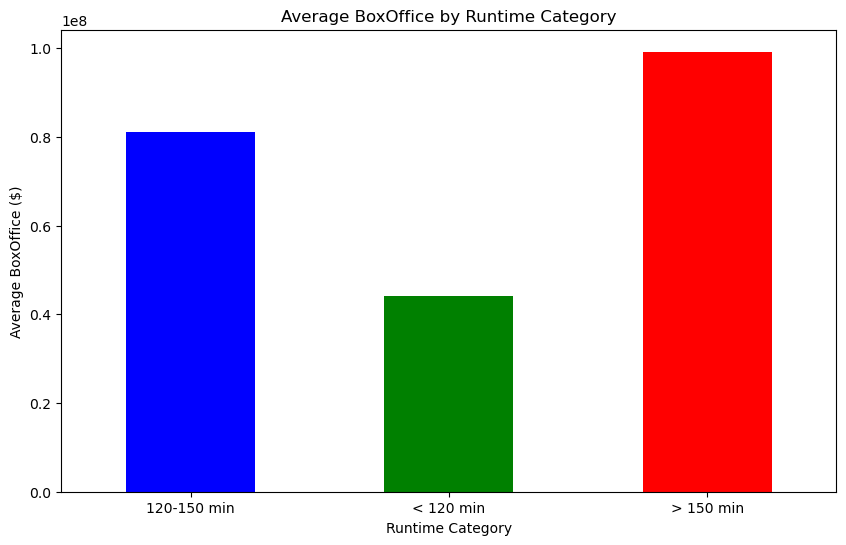

In [2]:
# Clean and extract runtime (Assume 'Runtime' is in the format '130 min')
def clean_runtime(runtime):
    if isinstance(runtime, str):
        return pd.to_numeric(runtime.replace(' min', ''), errors='coerce')
    return None

df['Runtime'] = df['Runtime'].apply(clean_runtime)

# Clean and convert BoxOffice data (Assume it's in the format '$xxx,xxx,xxx')
def clean_box_office(box_office):
    if isinstance(box_office, str):
        return pd.to_numeric(box_office.replace('$', '').replace(',', ''), errors='coerce')
    return None

df['BoxOffice'] = df['BoxOffice'].apply(clean_box_office)

# Drop rows where 'Runtime' or 'BoxOffice' is NaN or empty
df = df.dropna(subset=['Runtime', 'BoxOffice'])  # Drop NaN values
df = df[(df['Runtime'] != '') & (df['BoxOffice'] != '')]  # Drop empty strings

# Display the updated DataFrame
print("\nUpdated DataFrame after dropping movies with missing Runtime or BoxOffice:")
print(df.head())
# Group movies by runtime categories
def classify_runtime(runtime):
    if runtime < 120:
        return '< 120 min'
    elif 120 <= runtime <= 150:
        return '120-150 min'
    else:
        return '> 150 min'

df['Runtime_Category'] = df['Runtime'].apply(classify_runtime)

# Group by runtime category and calculate average BoxOffice
runtime_boxoffice_avg = df.groupby('Runtime_Category')['BoxOffice'].mean()

# Print the average BoxOffice for each runtime category
print(runtime_boxoffice_avg)

# Visualize the result
plt.figure(figsize=(10, 6))
runtime_boxoffice_avg.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average BoxOffice by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average BoxOffice ($)')
plt.xticks(rotation=0)
plt.show()